# CIND 820 Project(Analytics, ML Modeling and Prediction of Financial Transactions)

#### Code Also available in Github repository https://github.com/hxp89/CIND_820_Project/blob/Feature/SRC/Project_820_HARIPRIYA.ipynb

#### **Importing Libraries**

In [26]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.metrics import accuracy_score,f1_score,precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings("ignore")

#### **Reading and creating a Dataframe using a csv file**

Source of the Dataset is https://www.kaggle.com/code/jrfillipi/starter-synthetic-financial-datasets-a147ad27-3/data

In [27]:
payments = pd.read_csv("C:/Users/16476/Documents/Courses/CIND_820_Project/archive_Online_Payments_Fraud_detection_datasets/PS_20174392719_1491204439457_log.csv")

*To see the data*

In [28]:
payments.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


### **Initial Data Exploration**

##### Datatypes of the Dataframe

In [29]:
payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


*There are 5 Floats, 3 Integers and 3 objects features*

##### Dimentionality of the Dataframe

In [30]:
f"Transaction Dataset have {payments.shape[0]} rows and {payments.shape[1]} features."

'Transaction Dataset have 6362620 rows and 11 features.'

##### Missing values and percentage calculations

In [31]:
pd.DataFrame(zip(payments.columns,
                 payments.isna().any(),
                (payments.isna().sum() / payments.shape[0]) * 100),
             columns=['Column', 'Has Missing Values?', '% Missing Values'])\
    .sort_values('% Missing Values', ascending=False)

,Column,Has Missing Values?,% Missing Values
0,step,False,0.0
1,type,False,0.0
2,amount,False,0.0
3,nameOrig,False,0.0
4,oldbalanceOrg,False,0.0
5,newbalanceOrig,False,0.0
6,nameDest,False,0.0
7,oldbalanceDest,False,0.0
8,newbalanceDest,False,0.0
9,isFraud,False,0.0


##### Description of Data

In [32]:
payments.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


*The Description explains the dataset is wide*

Boxplot of Numeric variables

BoxPlot of numeric variables


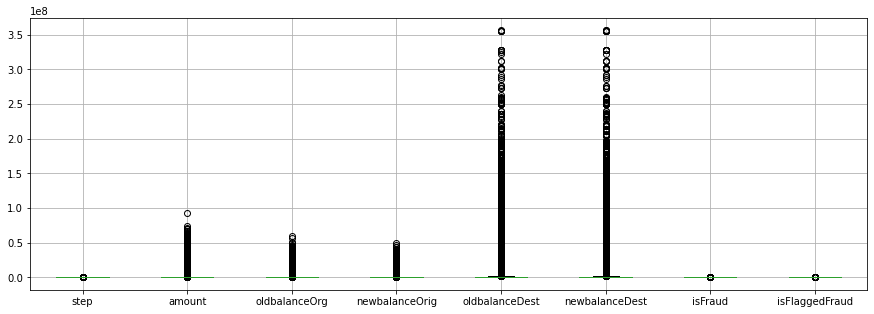

In [33]:
print("BoxPlot of numeric variables")
plot = payments.boxplot(column= ['step', 'amount', 'oldbalanceOrg','newbalanceOrig', 'oldbalanceDest', 'newbalanceDest','isFraud', 'isFlaggedFraud'],figsize=(15, 5))

*Tha data set lot of Outliners. Due to its extant the outliers will not be removed*

##### Correlation heatmap between the Variables

Text(0.5, 1, 'Pearson correlation of Features')


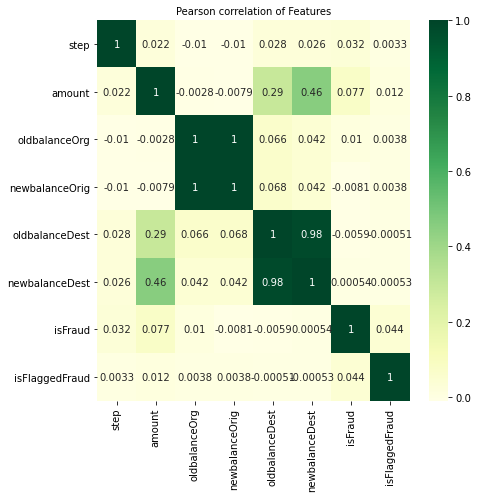

In [34]:
corr = payments.corr()

f, ax = plt.subplots(figsize=(7,7))
cmap = sns.diverging_palette(220, 10,  as_cmap=True)
_ = sns.heatmap(corr, cmap="YlGn", ax=ax, annot=True)

print(plt.title("Pearson correlation of Features", y=1, size=10))

plt.show()

*o	OldbalanceOrg and newbalanceOrg are highly correlatable.*

*o	OldbalanceDest and newbalanceDest are highly correlatable.*

*o	Amount with newbalanceDest and Amount with oldbalanceDest are correlatable*

*o	At this stage IsFraud is correlatable to the amount only.*


*Correlation chart will be again created during Feature engineering by deducing more feature from the given dataset.*


##### Frequency Distribution of Transaction types

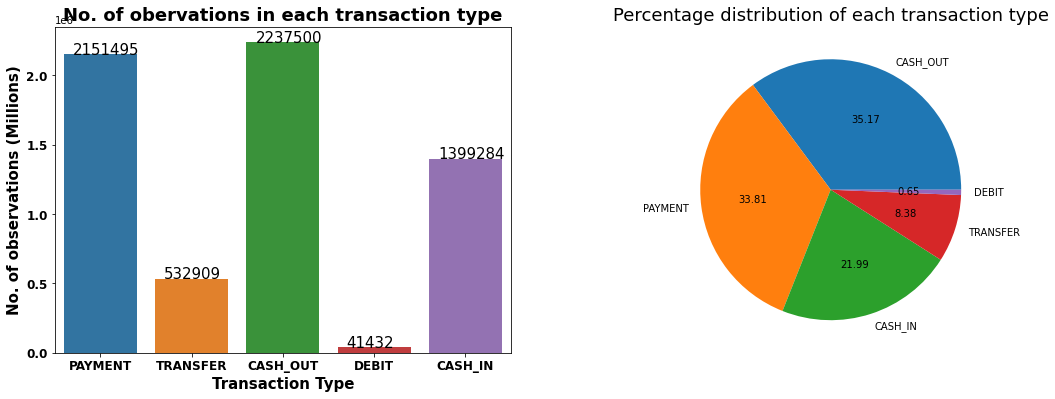

In [35]:
# transaction type
plt.subplots(1,2, figsize=(18,6))

# countplot to visualize the no. of observations under each class
plt.subplot(1,2,1)
ax = sns.countplot(payments['type'])
plt.xlabel('Transaction Type', fontsize=15, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')
plt.ylabel('No. of observations (Millions)', fontsize=15, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.title('No. of obervations in each transaction type', fontsize=18, fontweight='bold')
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+0.1, i.get_height(), str(round(i.get_height(), 2)), fontsize=15, color='black')

# pie chart to visualize the percentage distribution of each class
plt.subplot(1,2,2)
plt.pie(payments['type'].value_counts(), labels=['CASH_OUT','PAYMENT','CASH_IN','TRANSFER','DEBIT'], autopct='%.2f')
plt.title('Percentage distribution of each transaction type', fontsize=18)

# display plot
plt.show()

##### Frequency distribution with respect to IsFraud class

In [36]:
pd.crosstab(payments.type, payments.isFraud)

isFraud,0,1
type,,
CASH_IN,1399284,0
CASH_OUT,2233384,4116
DEBIT,41432,0
PAYMENT,2151495,0
TRANSFER,528812,4097


In [37]:
print("Highest amount and Lowest amount transacted in each transaction type:")
lst = []
for t_type in payments['type'].unique():
    lst.append([t_type,payments.loc[(payments['type'] == t_type), 'amount'].max(), payments.loc[(payments['type'] == t_type), 'amount'].min()])

df1 = pd.DataFrame(lst, columns=['type','max','min'])   
df1 

Highest amount and Lowest amount transacted in each transaction type:


,type,max,min
0,PAYMENT,238637.98,0.02
1,TRANSFER,92445516.64,2.60
2,CASH_OUT,10000000.00,0.00
3,DEBIT,569077.51,0.55
4,CASH_IN,1915267.90,0.04


*Looking at the data, we can see that Transfers and Cash_out has max limits*

##### Highest amount and Lowest amount transacted in each Fradulent transaction type

In [38]:
print("Highest amount and Lowest amount transacted in Fradulent transaction type:")
a = pd.crosstab(payments.type, payments.isFraud)

lst = []
for t_type in ['CASH_OUT','TRANSFER']:
    lst.append([t_type,payments.loc[(payments['type'] == t_type), 'amount'].max(), payments.loc[(payments['type'] == t_type), 'amount'].min()])

df2 = pd.DataFrame(lst, columns=['type','max','min'])   

df2

Highest amount and Lowest amount transacted in Fradulent transaction type:


,type,max,min
0,CASH_OUT,10000000.00,0.0
1,TRANSFER,92445516.64,2.6


##### Amount Lost due to Fradulent Transactions

In [39]:
lst = []
for t_type in ['CASH_OUT','TRANSFER']:
    lst.append([t_type,"${:,.2f}".format(payments.loc[((payments['type'] == t_type) & (payments['isFraud'] == 1)), 'amount'].sum())])

df3 = pd.DataFrame(lst, columns=['type','sum'])  

df3

,type,sum
0,CASH_OUT,"$5,989,202,243.83"
1,TRANSFER,"$6,067,213,184.01"


### **Feature Engineering**

Understanding the Type of Interaction/Transaction

In [40]:
# transaction type
payments['transactionBetween'] = payments['nameDest'].apply(lambda x: 'Customer2Customer' if x[0] == "C" else 'Customer2Merchant')

Frequency distribution of Interaction types and with respect to isFraud Class

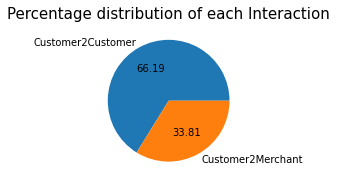

In [41]:
tb = sns.countplot(payments['transactionBetween'])
for i in tb.patches:
    # get_x pulls left or right; get_height pushes up or down
    tb.text(i.get_x()+0.1, i.get_height(), str(round(i.get_height(), 2)), fontsize=15, color='black')

plt.subplot(1,2,2)
plt.pie(payments['transactionBetween'].value_counts(), labels=['Customer2Customer','Customer2Merchant'], autopct='%.2f')
plt.title('Percentage distribution of each Interaction', fontsize=15)

# display plot
plt.show()



In [42]:
print('No of Fraudulents in Each TransactionBetween')
pd.crosstab(payments.transactionBetween, payments.isFraud)

No of Fraudulents in Each TransactionBetween


isFraud,0,1
transactionBetween,,
Customer2Customer,4202912,8213
Customer2Merchant,2151495,0


*The Crosstab table shows that most of the transactions happened between Customer to Customer transactions*

##### Calculating Error between the Amounts and the Balance between Origin and destination start and end Balance

In [43]:

payments['errorBalanceOrig'] = payments['newbalanceOrig'] + payments['amount'] - payments['oldbalanceOrg']

payments['errorBalanceDest'] = payments['oldbalanceDest'] + payments['amount'] - payments['newbalanceDest']

In [44]:
payments['errorBalanceOrig_flag'] = payments['errorBalanceOrig'].apply(lambda x: 0 if x == 0 else 1)

payments['errorBalanceDest_flag'] = payments['errorBalanceDest'].apply(lambda x: 0 if x == 0 else 1)

Creating Flags with respect to Errors

In [45]:
def flag(x):
    if x[0] == 0 and x[1] == 0:
        return 0
    return 1

In [46]:
payments['Flag'] = payments.apply(flag,axis=1)

In [47]:
payments['Flag'].value_counts()

1    6362620
Name: Flag, dtype: int64

*Based on the End of Results, The Flag has not featched any clarity as all the transactions has some errors with respect to balances*

##### Transactions per hour and Description Analysis of the Transaction with respect to Time

In [48]:
# transaction hour
payments['transactionHour'] = payments['step'] % 24
# converting into object type
payments['transactionHour'] = payments['transactionHour'].astype('object')

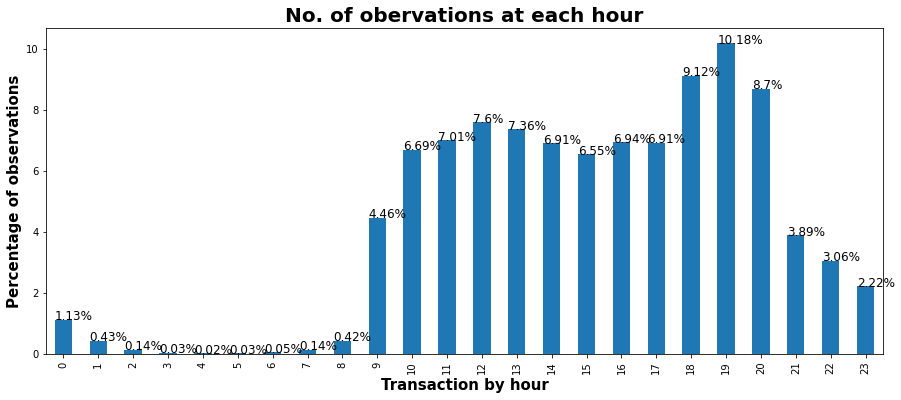

In [49]:
plt.figure(figsize=(15,6))
ax = (payments['transactionHour'].value_counts(sort = False,normalize=True)* 100).plot(kind = 'bar')
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x(), i.get_height(), str(round(i.get_height(), 2)) + "%", fontsize=12, color='black')
plt.title('No. of obervations at each hour', fontsize=20, fontweight='bold')
plt.xlabel('Transaction by hour', fontsize=15, fontweight='bold')
plt.ylabel('Percentage of observations', fontsize=15, fontweight='bold')
plt.show()

*The data depects that most transactions happen during business hours*

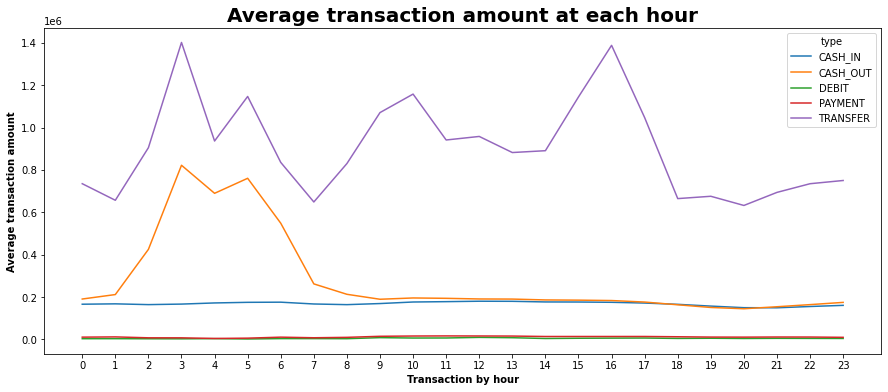

In [50]:
# avg. transaction amount at each hour for each transaction type
plt.figure(figsize=(15,6))
sns.lineplot(data=payments
                .groupby(['transactionHour','type'])
                .agg({'amount' : 'mean'})
                .round(2).reset_index(),
             x='transactionHour',
             y='amount',
             hue='type')
plt.xlabel('Transaction by hour', fontsize=10, fontweight='bold')
plt.xticks(range(24), range(24))
plt.ylabel('Average transaction amount', fontsize=10, fontweight='bold')
plt.title('Average transaction amount at each hour', fontsize=20, fontweight='bold')
plt.show()

*Observations:*

*Average amount for Transfer type transactions peak at 3 hrs and 16 hrs.*

*Average amount for Cash-Out type transactions peak between 3 hrs and 5 hrs.*

*Average amount for Cash-In type transactions is stable through out the day.*

*Average amount for Debit and Payment type transactions peak between 9 hrs and 13 hrs.*

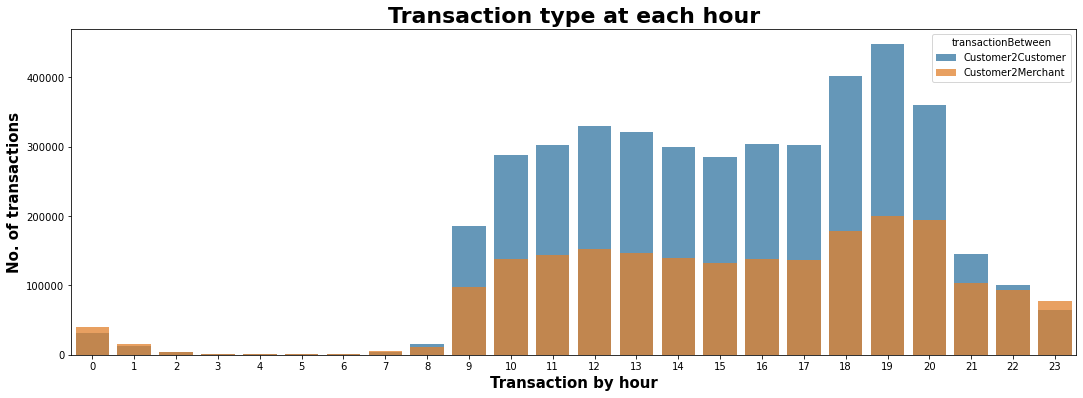

In [51]:
# no. of. transaction amount at each hour for each transaction type
plt.figure(figsize=(18,6))
sns.barplot(data=payments.groupby(['transactionHour','transactionBetween']).size().reset_index(),
            x='transactionHour',
            y=0,
            hue='transactionBetween',
            dodge=False,
            alpha=0.75)
plt.xlabel('Transaction by hour', fontsize=15, fontweight='bold')
plt.xticks(range(24), range(24))
plt.ylabel('No. of transactions', fontsize=15, fontweight='bold')
plt.title('Transaction type at each hour', fontsize=22, fontweight='bold')
plt.show()

Observations:

During day, Customer to Customer transactions are greater than Customer to Merchant transactions.
During mid-night, Customer to Merchant transactions are greater than Customer to Customer transactions.

##### Analysis on Fraudulent Transactions Data with respect to Time

In [52]:
payments_fraud = payments[payments['isFraud'] == 1]

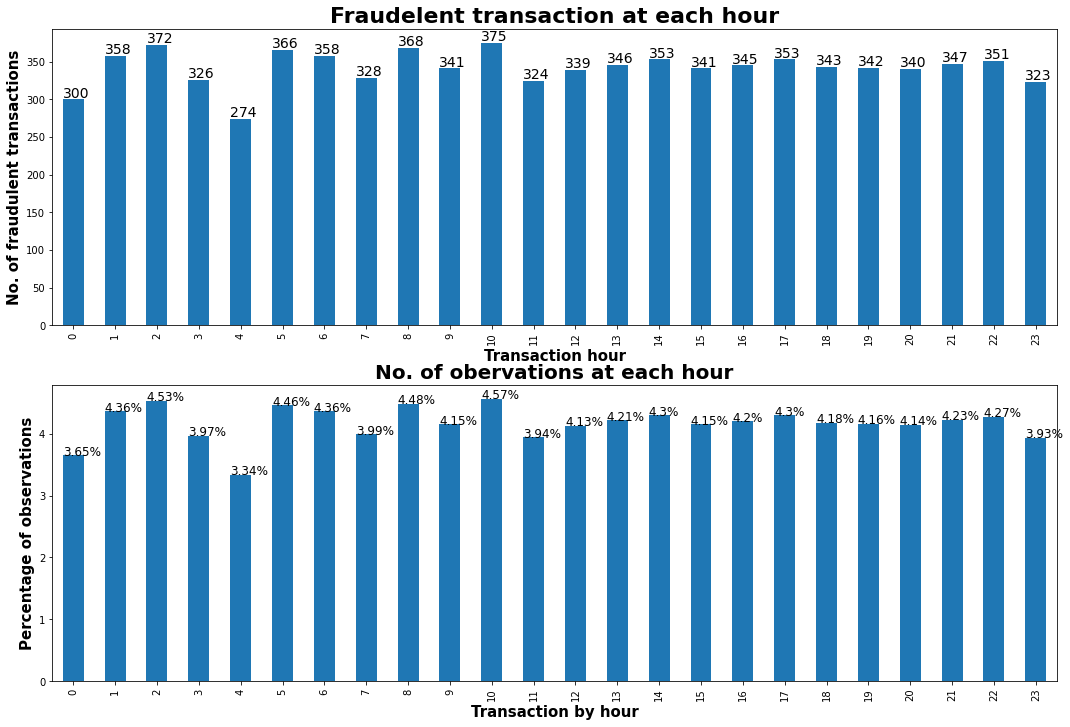

In [53]:
# when does fraud happen? (time of day)
plt.subplots(2,1, figsize=(18,12))

# actual count of fraud cases
plt.subplot(2,1,1)
ax=payments_fraud.groupby('transactionHour').size().plot(kind='bar')
plt.xlabel('Transaction hour', fontsize=15, fontweight='bold')
plt.xticks(range(24), range(24))
plt.ylabel('No. of fraudulent transactions', fontsize=15, fontweight='bold')
plt.title('Fraudelent transaction at each hour', fontsize=22, fontweight='bold')
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x(), i.get_height()+3, str(round(i.get_height(), 2)), fontsize=14, color='black')

# proportion of fraud
plt.subplot(2,1,2)
ax = (payments_fraud['transactionHour'].value_counts(sort = False,normalize=True)* 100).plot(kind = 'bar')
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x(), i.get_height(), str(round(i.get_height(), 2)) + "%", fontsize=12, color='black')
plt.title('No. of obervations at each hour', fontsize=20, fontweight='bold')
plt.xlabel('Transaction by hour', fontsize=15, fontweight='bold')
plt.ylabel('Percentage of observations', fontsize=15, fontweight='bold')
plt.show()

*Fraudulent Transactions are consistent with Time. there is no major deviations*

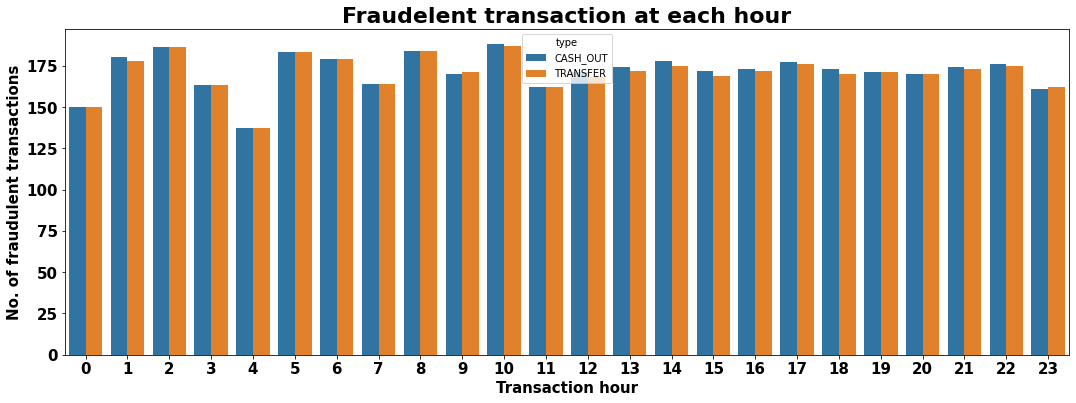

In [54]:
# when does fraud happen? (time of day)
plt.figure(figsize=(18,6))
ax=sns.barplot(data=payments_fraud.groupby(['transactionHour','type']).size().reset_index(),
               x='transactionHour',
               y=0,
               hue='type')
plt.xlabel('Transaction hour', fontsize=15, fontweight='bold')
plt.xticks(range(24), range(24),fontsize=15, fontweight='bold', rotation=0)
plt.ylabel('No. of fraudulent transactions', fontsize=15, fontweight='bold')
plt.yticks(fontsize=15, fontweight='bold')
plt.title('Fraudelent transaction at each hour', fontsize=22, fontweight='bold')
plt.show()

*No much difference in Fradulents with respect to Cash_Out and Transfers*

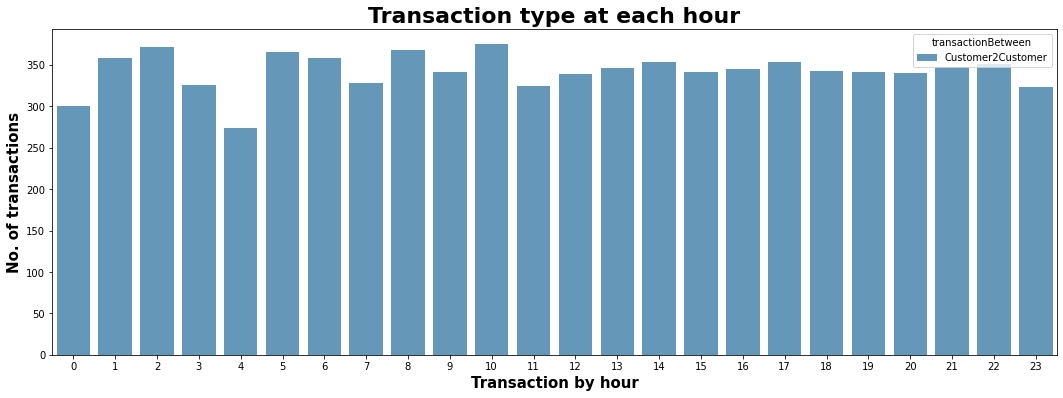

In [55]:
# avg. transaction amount at each hour for each transaction type
plt.figure(figsize=(18,6))
sns.barplot(data=payments_fraud.groupby(['transactionHour','transactionBetween']).size().reset_index(),
            x='transactionHour',
            y=0,
            hue='transactionBetween',
            dodge=False,
            alpha=0.75)
plt.xlabel('Transaction by hour', fontsize=15, fontweight='bold')
plt.xticks(range(24), range(24))
plt.ylabel('No. of transactions', fontsize=15, fontweight='bold')
plt.title('Transaction type at each hour', fontsize=22, fontweight='bold')
plt.show()

*No much variation or anomolies with Fradulent transactions by Time*

##### Start and End of Transactions of Origin and Destination are Zero and Analysis with isFraud Flag

In [56]:
# flag to indicate whether both old and new balance in origin account are zero
payments['zeroBalanceOrig'] = payments['oldbalanceOrg'] + payments['newbalanceOrig']
payments['zeroBalanceOrig'] = payments['zeroBalanceOrig'].apply(lambda x: 1 if x == 0 else 0)

In [57]:
# flag to indicate whether both old and new balance in destination account are zero
payments['zeroBalanceDest'] = payments['oldbalanceDest'] + payments['newbalanceDest']
payments['zeroBalanceDest'] = payments['zeroBalanceDest'].apply(lambda x: 1 if x == 0 else 0)

In [58]:
def with_hue(plot, feature, Number_of_categories, hue_categories):
    a = [p.get_height() for p in plot.patches]
    patch = [p for p in plot.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            percentage = '{:.1f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 - 0.15
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() 
            ax.annotate(percentage, (x, y), size = 12)
    plt.show()

def without_hue(plot, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)
    plt.show()

isFraud                0     1
zeroBalanceOrig               
0                4265463  8172
1                2088944    41


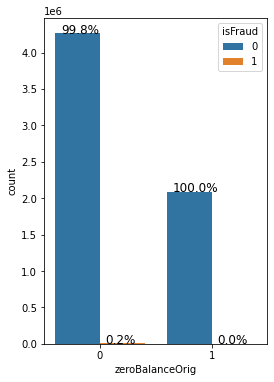

In [59]:
print(pd.crosstab(payments.zeroBalanceOrig, payments.isFraud))
plt.figure(figsize=(4,6))
ax = sns.countplot('zeroBalanceOrig', hue = 'isFraud', data = payments)

with_hue(ax,payments.zeroBalanceOrig,2,2)

*No much Reason to indicate if the zero balance in origin will be fradulent*

isFraud                0     1
zeroBalanceDest               
0                4041201  4137
1                2313206  4076


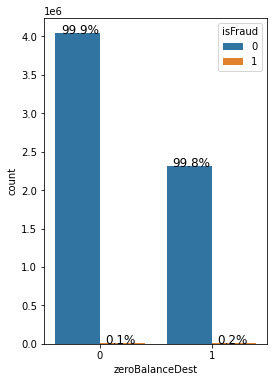

In [60]:
print(pd.crosstab(payments.zeroBalanceDest, payments.isFraud))
plt.figure(figsize=(4,6))
ax = sns.countplot('zeroBalanceDest', hue = 'isFraud', data = payments)

with_hue(ax,payments.zeroBalanceDest,2,2)

*No much Reason to indicate if the zero balance in Destination will be fradulent*

##### Find if same origin account name have frauded more than once

In [67]:
main_1 = payments[payments['isFraud'] == 1]
len(main_1)

In [61]:
orig_agg = pd.DataFrame(data = payments, columns= ['nameOrig','isFraud'])
grouped_df_org = orig_agg.groupby("nameOrig")
sums_org = grouped_df_org.sum()
sums_org = sums_org.reset_index()


Find if same Destination account name have frauded more than once

In [62]:
dest_agg = pd.DataFrame(data = payments, columns= ['nameDest','isFraud'])
grouped_df_dest = dest_agg.groupby("nameDest")
sums_dest = grouped_df_dest.sum()
sums_dest = sums_dest.reset_index()

In [71]:
print("Frauds from Main data:",len(main_1))
print("Fraud origin accounts has ever been Fradulent more than once:",len(sums_org[sums_org['isFraud'] > 0]))
print("Fraud Destination accounts has ever been Fradulent more than once :", len(sums_dest[sums_dest['isFraud'] > 0]))

Frauds from Main data: 8213
Fraud origin accounts has ever been Fradulent more than once: 8213
Fraud Destination accounts has ever been Fradulent more than once : 8169


*Based on the results we can see that not much difference between the main Frauds, Fraud origin accounts has ever been Fradulent more than once and Fraud Destination accounts has ever been Fradulent more than once*

### **Feature Selection**

Changing TransactionHour Column to numeric for Feature selection

In [72]:
payments[["transactionHour"]] = payments[["transactionHour"]].apply(pd.to_numeric)

Text(0.5, 1, 'Pearson correlation of Features')


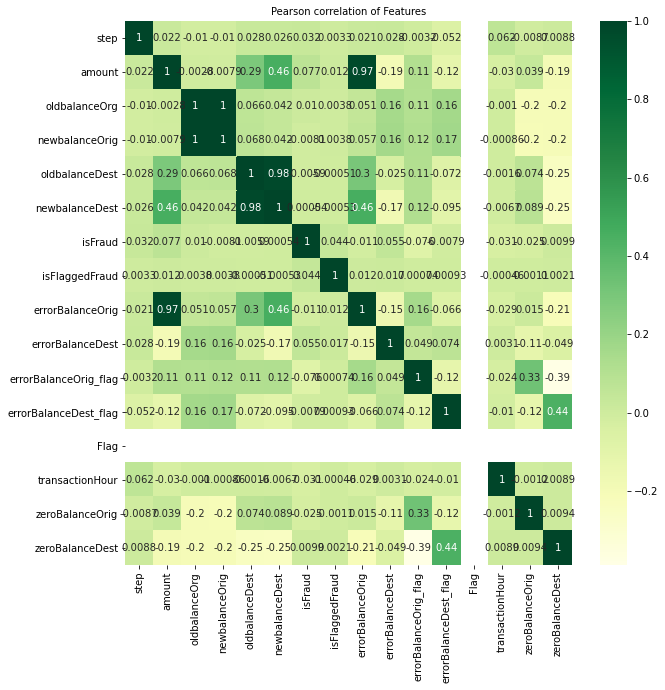

In [73]:
corr = payments.corr()

f, ax = plt.subplots(figsize=(10,10))
cmap = sns.diverging_palette(220, 10,  as_cmap=True)
_ = sns.heatmap(corr, cmap="YlGn", ax=ax, annot=True)

print(plt.title("Pearson correlation of Features", y=1, size=10))

plt.show()

*Based on the data: decided to remove isFlaggedFraud,nameOrig, nameDest and Flag Features*

In [74]:
payments = payments.drop(columns=['isFlaggedFraud','nameOrig','nameDest','Flag'])

In [75]:
payments

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,transactionBetween,errorBalanceOrig,errorBalanceDest,errorBalanceOrig_flag,errorBalanceDest_flag,transactionHour,zeroBalanceOrig,zeroBalanceDest
0,1,PAYMENT,9839.64,170136.00,160296.36,0.00,0.00,0,Customer2Merchant,0.0,9.839640e+03,0,1,1,0,1
1,1,PAYMENT,1864.28,21249.00,19384.72,0.00,0.00,0,Customer2Merchant,0.0,1.864280e+03,0,1,1,0,1
2,1,TRANSFER,181.00,181.00,0.00,0.00,0.00,1,Customer2Customer,0.0,1.810000e+02,0,1,1,0,1
3,1,CASH_OUT,181.00,181.00,0.00,21182.00,0.00,1,Customer2Customer,0.0,2.136300e+04,0,1,1,0,0
4,1,PAYMENT,11668.14,41554.00,29885.86,0.00,0.00,0,Customer2Merchant,0.0,1.166814e+04,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,339682.13,0.00,0.00,339682.13,1,Customer2Customer,0.0,0.000000e+00,0,0,23,0,0
6362616,743,TRANSFER,6311409.28,6311409.28,0.00,0.00,0.00,1,Customer2Customer,0.0,6.311409e+06,0,1,23,0,1
6362617,743,CASH_OUT,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,Customer2Customer,0.0,1.000000e-02,0,1,23,0,0
6362618,743,TRANSFER,850002.52,850002.52,0.00,0.00,0.00,1,Customer2Customer,0.0,8.500025e+05,0,1,23,0,1


### **Preprocessing**

*As the Data is Huge and we are only Looking for Fraudulent and also been able to establish that Fraudulent Transaction were occuring in CASH_OUT and TRANSFERS. Hence the data set is reduce to look at only CASH_OUT and TRANSFERS type*

In [76]:
# subsetting fraudulent transactions
payments_fraud = payments[payments['isFraud'] == 1]

# subsetting non-fraudulent transactions
payments_nonfraud = payments[(payments['isFraud'] == 0) & (payments['type'].isin(['CASH_OUT','TRANSFER']))]

# creating a new dataframe from sub-sampled data
payments_new = pd.concat([payments_fraud, payments_nonfraud], axis=0)

# dataframe dimensions
print(f"The new sub-set table has {payments_new.shape[0]} rows and {payments_new.shape[1]} columns.")

The new sub-set table has 2770409 rows and 16 columns.


In [77]:
# Creating a copy for modeling
payments_model = payments_new

In [78]:
# Categorical Variables
cat = payments_model.select_dtypes(include='O').keys()
cat

Index(['type', 'transactionBetween'], dtype='object')

*Onehot Encoding to change Categorical to Numeric*

In [79]:
payments_onehot=payments_model.copy()

In [80]:

#convert only categorical variables/features to dummy/one-hot features
payments_onehot = pd.get_dummies(payments_onehot, columns=cat, prefix = cat)
#print the dataset
payments_onehot


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,errorBalanceOrig,errorBalanceDest,errorBalanceOrig_flag,errorBalanceDest_flag,transactionHour,zeroBalanceOrig,zeroBalanceDest,type_CASH_OUT,type_TRANSFER,transactionBetween_Customer2Customer
2,1,181.00,181.0,0.0,0.00,0.00,1,0.00,181.0,0,1,1,0,1,0,1,1
3,1,181.00,181.0,0.0,21182.00,0.00,1,0.00,21363.0,0,1,1,0,0,1,0,1
251,1,2806.00,2806.0,0.0,0.00,0.00,1,0.00,2806.0,0,1,1,0,1,0,1,1
252,1,2806.00,2806.0,0.0,26202.00,0.00,1,0.00,29008.0,0,1,1,0,0,1,0,1
680,1,20128.00,20128.0,0.0,0.00,0.00,1,0.00,20128.0,0,1,1,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362313,718,111963.72,4514.0,0.0,154925.27,266888.99,0,107449.72,0.0,1,0,22,0,0,1,0,1
6362317,718,317177.48,170.0,0.0,345042.13,662219.61,0,317007.48,0.0,1,0,22,0,0,1,0,1
6362320,718,159188.22,3859.0,0.0,0.00,159188.22,0,155329.22,0.0,1,0,22,0,0,1,0,1
6362321,718,186273.84,168046.0,0.0,24893.67,211167.51,0,18227.84,0.0,1,0,22,0,0,1,0,1


In [81]:
class_col_name = 'isFraud'
one_hot_feature_names=payments_onehot.columns[payments_onehot.columns != class_col_name]
print(one_hot_feature_names)
#print(payments_onehot.loc[:,one_hot_feature_names])

Index(['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'errorBalanceOrig', 'errorBalanceDest',
       'errorBalanceOrig_flag', 'errorBalanceDest_flag', 'transactionHour',
       'zeroBalanceOrig', 'zeroBalanceDest', 'type_CASH_OUT', 'type_TRANSFER',
       'transactionBetween_Customer2Customer'],
      dtype='object')


*Spliting data set into Train and test to 70:30 Ratio*

In [82]:
from sklearn.model_selection import train_test_split
# Split dataset into training set and test set
X_train, X_test, Y_train, Y_test = train_test_split(payments_onehot.loc[:,one_hot_feature_names], payments_onehot[class_col_name],train_size=0.7,test_size=0.3,random_state=109) 
# 70% training and 30% test

*Dataset Ratio of X Independent Variables and Y Depentent Variable*

In [83]:
print("X:", len(X_train), ":", len(X_test))
print("Y:",len(Y_train),":", len(Y_test))

X: 1939286 : 831123
Y: 1939286 : 831123


*As the Data set is very Imbalanced, Using SMOTE we are trying to oversamle the class*

In [84]:
print("Before OverSampling, counts of label '1': {}".format(sum(Y_train == 1)))
print("Before OverSampling, counts of label '0': {}".format(sum(Y_train == 0)))

Before OverSampling, counts of label '1': 5762
Before OverSampling, counts of label '0': 1933524


In [85]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 2)
X_train_res, Y_train_res = sm.fit_resample(X_train, Y_train)

In [86]:
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(Y_train_res.shape))

print("Before OverSampling, counts of label '1': {}".format(sum(Y_train == 1)))
print("Before OverSampling, counts of label '0': {}".format(sum(Y_train == 0)))
  
print("After OverSampling, counts of label '1': {}".format(sum(Y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(Y_train_res == 0)))

After OverSampling, the shape of train_X: (3867048, 16)
After OverSampling, the shape of train_y: (3867048,) 

Before OverSampling, counts of label '1': 5762
Before OverSampling, counts of label '0': 1933524
After OverSampling, counts of label '1': 1933524
After OverSampling, counts of label '0': 1933524


### **Modelling**

##### Decision Tree Classifier

In [87]:
DecisionTreeClassifier_Model_With_SOMTE = DecisionTreeClassifier()
DTC_W_SMOTE = DecisionTreeClassifier_Model_With_SOMTE.fit(X_train_res,Y_train_res)

In [88]:
DecisionTreeClassifier_Model_WithOut_SOMTE = DecisionTreeClassifier()
DTC_WO_SMOTE = DecisionTreeClassifier_Model_WithOut_SOMTE.fit(X_train,Y_train)

##### Logistics Regression

In [89]:
LogisticsRegression_Model_With_SOMTE = LogisticRegression()
LR_M_W_SMOTE = LogisticsRegression_Model_With_SOMTE.fit(X_train_res,Y_train_res)

In [90]:
LogisticsRegression_Model_WithOut_SOMTE = LogisticRegression()
LR_M_WO_SMOTE = LogisticsRegression_Model_WithOut_SOMTE.fit(X_train,Y_train)

##### Naive Bayes

In [91]:
NaiveBayes_Model_With_SOMTE = MultinomialNB()

from sklearn.preprocessing import MinMaxScaler
NaiveBayes_Model_With_SOMTE = Pipeline([('Normalizing',MinMaxScaler()),('MultinomialNB',MultinomialNB())])
NB_W_SMOTE = NaiveBayes_Model_With_SOMTE.fit(X_train_res,Y_train_res)

In [92]:
NaiveBayes_Model_WithOut_SOMTE = MultinomialNB()

from sklearn.preprocessing import MinMaxScaler
NaiveBayes_Model_WithOut_SOMTE = Pipeline([('Normalizing',MinMaxScaler()),('MultinomialNB',MultinomialNB())])
NB_WO_SMOTE = NaiveBayes_Model_WithOut_SOMTE.fit(X_train,Y_train)

##### GaussianNB

In [93]:
GaussianNB_Model_With_SOMTE = GaussianNB()
G_W_SMOTE = GaussianNB_Model_With_SOMTE.fit(X_train_res,Y_train_res)

In [94]:
GaussianNB_WithOut_SOMTE = GaussianNB()
G_WO_SMOTE = GaussianNB_WithOut_SOMTE.fit(X_train,Y_train)

### Evaluvate Models

##### Prediction scores

In [95]:
Models = [DTC_W_SMOTE,DTC_WO_SMOTE,LR_M_W_SMOTE,LR_M_WO_SMOTE,NB_W_SMOTE,NB_WO_SMOTE,G_W_SMOTE,G_WO_SMOTE]

In [96]:
#Functions
def name_of_global_obj(xx):
    for objname, oid in globals().items():
        if oid is xx:
            return objname
def evaluvate_model(Models, X_test, Y_test):
    MLA = Models
    MLA_columns = []
    MLA_compare = pd.DataFrame(columns = MLA_columns)
    row_index = 0
    for alg in MLA:
        predicted = alg.predict(X_test)
        MLA_name = name_of_global_obj(alg)
        MLA_compare.loc[row_index,'Model Name'] = MLA_name
        #MLA_compare.loc[row_index, 'Type1 Error'] = round(alg.score['test_type1'],2)
        #MLA_compare.loc[row_index, 'Type2 Error'] = round(alg.score['test_type2'],2)
        MLA_compare.loc[row_index, 'Accuracy_score'] = round(accuracy_score(Y_test,predicted),2)
        MLA_compare.loc[row_index, 'Recall'] = round(recall_score(Y_test, predicted),2)
        MLA_compare.loc[row_index, 'Precision'] = round(precision_score(Y_test, predicted),2)
        MLA_compare.loc[row_index, 'F1 score'] = round(f1_score(Y_test, predicted),2)
        cf=confusion_matrix(Y_test, predicted)
        tn, fp, fn, tp = cf.ravel()
        MLA_compare.loc[row_index, 'AOC score'] = round(roc_auc_score(Y_test, predicted),2)
        MLA_compare.loc[row_index, 'Type I errors'] = fp
        MLA_compare.loc[row_index, 'Type II errors'] = fn
       
        row_index+=1
     
    return MLA_compare  


In [114]:
eval = evaluvate_model(Models, X_test, Y_test)

In [124]:
eval

,Model Name,Accuracy_score,Recall,Precision,F1 score,AOC score,Type I errors,Type II errors
0,DecisionTreeClassifier_Model_With_SOMTE,1.00,1.00,0.98,0.99,1.00,41.0,5.0
1,DecisionTreeClassifier_Model_WithOut_SOMTE,1.00,1.00,0.99,1.00,1.00,15.0,7.0
2,LogisticsRegression_Model_With_SOMTE,0.90,0.97,0.03,0.05,0.93,86868.0,64.0
3,LogisticsRegression_Model_WithOut_SOMTE,1.00,0.52,0.83,0.64,0.76,269.0,1171.0
4,NaiveBayes_Model_With_SOMTE,0.95,0.91,0.05,0.09,0.93,45412.0,215.0
5,NaiveBayes_Model_WithOut_SOMTE,1.00,0.50,0.91,0.65,0.75,119.0,1224.0
6,GaussianNB_Model_With_SOMTE,0.98,0.47,0.07,0.12,0.72,15698.0,1311.0
7,GaussianNB_WithOut_SOMTE,0.99,0.40,0.10,0.16,0.69,9053.0,1471.0


*Based on the numbers We can see that Decision Tree Clasifier with SMOTE has better performance*

*Type I Error which is False Postives and Type II error which are False Negitives(More important as we do not want mark fradulent as NON Fradulent Transactions)*

##### K Foldes stratified Cross Validation

In [98]:
df_CrossV = pd.DataFrame(columns = ["Model Name","KfoldsCV_Accuracy"])

In [101]:
from sklearn.pipeline import make_pipeline

In [102]:
# Create an instance of Pipeline
print("DecisionTreeClassifier with SMOTE")
pipeline = make_pipeline(StandardScaler(), DecisionTreeClassifier())

# Create an instance of StratifiedKFold which can be used to get indices of different training and test folds

strtfdKFold = StratifiedKFold(n_splits=10)
kfold = strtfdKFold.split(X_train_res, Y_train_res)
scores = []

for k, (train, test) in enumerate(kfold):
    pipeline.fit(X_train_res.iloc[train, :], Y_train_res.iloc[train])
    score = pipeline.score(X_train_res.iloc[test, :], Y_train_res.iloc[test])
    scores.append(score)
    print('Fold: %2d, Training/Test Split Distribution: %s, Accuracy: %.3f' % (k+1, np.bincount(Y_train_res.iloc[train]), score))
 


print('\n\nCross-Validation accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))
df_CrossV.loc[len(df_CrossV.index)] = ['DecisionTreeClassifier_Model_With_SOMTE', np.mean(scores)] 

DecisionTreeClassifier with SMOTE
Fold:  1, Training/Test Split Distribution: [1740171 1740172], Accuracy: 1.000
Fold:  2, Training/Test Split Distribution: [1740171 1740172], Accuracy: 1.000
Fold:  3, Training/Test Split Distribution: [1740171 1740172], Accuracy: 1.000
Fold:  4, Training/Test Split Distribution: [1740171 1740172], Accuracy: 1.000
Fold:  5, Training/Test Split Distribution: [1740172 1740171], Accuracy: 1.000
Fold:  6, Training/Test Split Distribution: [1740172 1740171], Accuracy: 1.000
Fold:  7, Training/Test Split Distribution: [1740172 1740171], Accuracy: 1.000
Fold:  8, Training/Test Split Distribution: [1740172 1740171], Accuracy: 1.000
Fold:  9, Training/Test Split Distribution: [1740172 1740172], Accuracy: 1.000
Fold: 10, Training/Test Split Distribution: [1740172 1740172], Accuracy: 1.000


Cross-Validation accuracy: 1.000 +/- 0.000


In [103]:
# Create an instance of Pipeline
print("DecisionTreeClassifier_Model_WithOut_SOMTE")
pipeline = make_pipeline(StandardScaler(), DecisionTreeClassifier())

# Create an instance of StratifiedKFold which can be used to get indices of different training and test folds

strtfdKFold = StratifiedKFold(n_splits=10)
kfold = strtfdKFold.split(X_train, Y_train)
scores = []

for k, (train, test) in enumerate(kfold):
    pipeline.fit(X_train_res.iloc[train, :], Y_train_res.iloc[train])
    score = pipeline.score(X_train_res.iloc[test, :], Y_train_res.iloc[test])
    scores.append(score)
    print('Fold: %2d, Training/Test Split Distribution: %s, Accuracy: %.3f' % (k+1, np.bincount(Y_train_res.iloc[train]), score))
 


print('\n\nCross-Validation accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))
df_CrossV.loc[len(df_CrossV.index)] = ['DecisionTreeClassifier_Model_WithOut_SOMTE', np.mean(scores)] 

DecisionTreeClassifier_Model_WithOut_SOMTE
Fold:  1, Training/Test Split Distribution: [1740171    5186], Accuracy: 1.000
Fold:  2, Training/Test Split Distribution: [1740171    5186], Accuracy: 1.000
Fold:  3, Training/Test Split Distribution: [1740171    5186], Accuracy: 1.000
Fold:  4, Training/Test Split Distribution: [1740171    5186], Accuracy: 1.000
Fold:  5, Training/Test Split Distribution: [1740172    5185], Accuracy: 1.000
Fold:  6, Training/Test Split Distribution: [1740172    5185], Accuracy: 1.000
Fold:  7, Training/Test Split Distribution: [1740172    5186], Accuracy: 1.000
Fold:  8, Training/Test Split Distribution: [1740172    5186], Accuracy: 1.000
Fold:  9, Training/Test Split Distribution: [1740172    5186], Accuracy: 1.000
Fold: 10, Training/Test Split Distribution: [1740172    5186], Accuracy: 1.000


Cross-Validation accuracy: 1.000 +/- 0.000


In [107]:
print("LogisticsRegression_Model_With_SOMTE")

pipeline = make_pipeline(StandardScaler(), LogisticRegression())

# Create an instance of StratifiedKFold which can be used to get indices of different training and test folds

strtfdKFold = StratifiedKFold(n_splits=10)
kfold = strtfdKFold.split(X_train_res, Y_train_res)
scores = []

for k, (train, test) in enumerate(kfold):
    pipeline.fit(X_train_res.iloc[train, :], Y_train_res.iloc[train])
    score = pipeline.score(X_train_res.iloc[test, :], Y_train_res.iloc[test])
    scores.append(score)
    print('Fold: %2d, Training/Test Split Distribution: %s, Accuracy: %.3f' % (k+1, np.bincount(Y_train_res.iloc[train]), score))
 
print('\n\nCross-Validation accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))
df_CrossV.loc[len(df_CrossV.index)] = ['LogisticsRegression_Model_With_SOMTE', np.mean(scores)] 

LogisticsRegression_Model_With_SOMTE
Fold:  1, Training/Test Split Distribution: [1740171 1740172], Accuracy: 0.971
Fold:  2, Training/Test Split Distribution: [1740171 1740172], Accuracy: 0.972
Fold:  3, Training/Test Split Distribution: [1740171 1740172], Accuracy: 0.973
Fold:  4, Training/Test Split Distribution: [1740171 1740172], Accuracy: 0.972
Fold:  5, Training/Test Split Distribution: [1740172 1740171], Accuracy: 0.972
Fold:  6, Training/Test Split Distribution: [1740172 1740171], Accuracy: 0.972
Fold:  7, Training/Test Split Distribution: [1740172 1740171], Accuracy: 0.972
Fold:  8, Training/Test Split Distribution: [1740172 1740171], Accuracy: 0.972
Fold:  9, Training/Test Split Distribution: [1740172 1740172], Accuracy: 0.972
Fold: 10, Training/Test Split Distribution: [1740172 1740172], Accuracy: 0.973


Cross-Validation accuracy: 0.972 +/- 0.000


In [108]:
print("LogisticsRegression_Model_WithOut_SOMTE")

pipeline = make_pipeline(StandardScaler(), LogisticRegression())

# Create an instance of StratifiedKFold which can be used to get indices of different training and test folds

strtfdKFold = StratifiedKFold(n_splits=10)
kfold = strtfdKFold.split(X_train, Y_train)
scores = []

for k, (train, test) in enumerate(kfold):
    pipeline.fit(X_train_res.iloc[train, :], Y_train_res.iloc[train])
    score = pipeline.score(X_train_res.iloc[test, :], Y_train_res.iloc[test])
    scores.append(score)
    print('Fold: %2d, Training/Test Split Distribution: %s, Accuracy: %.3f' % (k+1, np.bincount(Y_train_res.iloc[train]), score))
 
print('\n\nCross-Validation accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))
df_CrossV.loc[len(df_CrossV.index)] = ['LogisticsRegression_Model_WithOut_SOMTE', np.mean(scores)] 

LogisticsRegression_Model_WithOut_SOMTE
Fold:  1, Training/Test Split Distribution: [1740171    5186], Accuracy: 0.999
Fold:  2, Training/Test Split Distribution: [1740171    5186], Accuracy: 0.999
Fold:  3, Training/Test Split Distribution: [1740171    5186], Accuracy: 0.999
Fold:  4, Training/Test Split Distribution: [1740171    5186], Accuracy: 0.999
Fold:  5, Training/Test Split Distribution: [1740172    5185], Accuracy: 0.999
Fold:  6, Training/Test Split Distribution: [1740172    5185], Accuracy: 0.999
Fold:  7, Training/Test Split Distribution: [1740172    5186], Accuracy: 0.999
Fold:  8, Training/Test Split Distribution: [1740172    5186], Accuracy: 0.999
Fold:  9, Training/Test Split Distribution: [1740172    5186], Accuracy: 0.999
Fold: 10, Training/Test Split Distribution: [1740172    5186], Accuracy: 0.999


Cross-Validation accuracy: 0.999 +/- 0.000


In [109]:
print("NaiveBayes_Model_With_SOMTE")
pipeline = Pipeline([('Normalizing',MinMaxScaler()),('MultinomialNB',MultinomialNB())])

# Create an instance of StratifiedKFold which can be used to get indices of different training and test folds

strtfdKFold = StratifiedKFold(n_splits=10)
kfold = strtfdKFold.split(X_train_res, Y_train_res)
scores = []

for k, (train, test) in enumerate(kfold):
    pipeline.fit(X_train_res.iloc[train, :], Y_train_res.iloc[train])
    score = pipeline.score(X_train_res.iloc[test, :], Y_train_res.iloc[test])
    scores.append(score)
    print('Fold: %2d, Training/Test Split Distribution: %s, Accuracy: %.3f' % (k+1, np.bincount(Y_train_res.iloc[train]), score))
 
print('\n\nCross-Validation accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))
df_CrossV.loc[len(df_CrossV.index)] = ['NaiveBayes_Model_With_SOMTE', np.mean(scores)] 

NaiveBayes_Model_With_SOMTE
Fold:  1, Training/Test Split Distribution: [1740171 1740172], Accuracy: 0.923
Fold:  2, Training/Test Split Distribution: [1740171 1740172], Accuracy: 0.924
Fold:  3, Training/Test Split Distribution: [1740171 1740172], Accuracy: 0.923
Fold:  4, Training/Test Split Distribution: [1740171 1740172], Accuracy: 0.923
Fold:  5, Training/Test Split Distribution: [1740172 1740171], Accuracy: 0.923
Fold:  6, Training/Test Split Distribution: [1740172 1740171], Accuracy: 0.922
Fold:  7, Training/Test Split Distribution: [1740172 1740171], Accuracy: 0.923
Fold:  8, Training/Test Split Distribution: [1740172 1740171], Accuracy: 0.922
Fold:  9, Training/Test Split Distribution: [1740172 1740172], Accuracy: 0.922
Fold: 10, Training/Test Split Distribution: [1740172 1740172], Accuracy: 0.923


Cross-Validation accuracy: 0.923 +/- 0.001


In [110]:
print("NaiveBayes_Model_WithOut_SOMTE")
pipeline = Pipeline([('Normalizing',MinMaxScaler()),('MultinomialNB',MultinomialNB())])

# Create an instance of StratifiedKFold which can be used to get indices of different training and test folds

strtfdKFold = StratifiedKFold(n_splits=10)
kfold = strtfdKFold.split(X_train, Y_train)
scores = []

for k, (train, test) in enumerate(kfold):
    pipeline.fit(X_train_res.iloc[train, :], Y_train_res.iloc[train])
    score = pipeline.score(X_train_res.iloc[test, :], Y_train_res.iloc[test])
    scores.append(score)
    print('Fold: %2d, Training/Test Split Distribution: %s, Accuracy: %.3f' % (k+1, np.bincount(Y_train_res.iloc[train]), score))
 
print('\n\nCross-Validation accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))
df_CrossV.loc[len(df_CrossV.index)] = ['NaiveBayes_Model_WithOut_SOMTE', np.mean(scores)] 

NaiveBayes_Model_WithOut_SOMTE
Fold:  1, Training/Test Split Distribution: [1740171    5186], Accuracy: 0.998
Fold:  2, Training/Test Split Distribution: [1740171    5186], Accuracy: 0.998
Fold:  3, Training/Test Split Distribution: [1740171    5186], Accuracy: 0.998
Fold:  4, Training/Test Split Distribution: [1740171    5186], Accuracy: 0.998
Fold:  5, Training/Test Split Distribution: [1740172    5185], Accuracy: 0.998
Fold:  6, Training/Test Split Distribution: [1740172    5185], Accuracy: 0.998
Fold:  7, Training/Test Split Distribution: [1740172    5186], Accuracy: 0.998
Fold:  8, Training/Test Split Distribution: [1740172    5186], Accuracy: 0.998
Fold:  9, Training/Test Split Distribution: [1740172    5186], Accuracy: 0.998
Fold: 10, Training/Test Split Distribution: [1740172    5186], Accuracy: 0.998


Cross-Validation accuracy: 0.998 +/- 0.000


In [111]:
print("GaussianNB_Model_With_SOMTE")
pipeline = make_pipeline(StandardScaler(), GaussianNB())

# Create an instance of StratifiedKFold which can be used to get indices of different training and test folds

strtfdKFold = StratifiedKFold(n_splits=10)
kfold = strtfdKFold.split(X_train_res, Y_train_res)
scores = []

for k, (train, test) in enumerate(kfold):
    pipeline.fit(X_train_res.iloc[train, :], Y_train_res.iloc[train])
    score = pipeline.score(X_train_res.iloc[test, :], Y_train_res.iloc[test])
    scores.append(score)
    print('Fold: %2d, Training/Test Split Distribution: %s, Accuracy: %.3f' % (k+1, np.bincount(Y_train_res.iloc[train]), score))
 
print('\n\nCross-Validation accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))
df_CrossV.loc[len(df_CrossV.index)] = ['GaussianNB_Model_With_SOMTE', np.mean(scores)] 

GaussianNB_Model_With_SOMTE
Fold:  1, Training/Test Split Distribution: [1740171 1740172], Accuracy: 0.912
Fold:  2, Training/Test Split Distribution: [1740171 1740172], Accuracy: 0.912
Fold:  3, Training/Test Split Distribution: [1740171 1740172], Accuracy: 0.912
Fold:  4, Training/Test Split Distribution: [1740171 1740172], Accuracy: 0.912
Fold:  5, Training/Test Split Distribution: [1740172 1740171], Accuracy: 0.912
Fold:  6, Training/Test Split Distribution: [1740172 1740171], Accuracy: 0.911
Fold:  7, Training/Test Split Distribution: [1740172 1740171], Accuracy: 0.911
Fold:  8, Training/Test Split Distribution: [1740172 1740171], Accuracy: 0.912
Fold:  9, Training/Test Split Distribution: [1740172 1740172], Accuracy: 0.912
Fold: 10, Training/Test Split Distribution: [1740172 1740172], Accuracy: 0.912


Cross-Validation accuracy: 0.912 +/- 0.001


In [112]:
print("GaussianNB_WithOut_SOMTE")
pipeline = make_pipeline(StandardScaler(), GaussianNB())

# Create an instance of StratifiedKFold which can be used to get indices of different training and test folds

strtfdKFold = StratifiedKFold(n_splits=10)
kfold = strtfdKFold.split(X_train, Y_train)
scores = []

for k, (train, test) in enumerate(kfold):
    pipeline.fit(X_train_res.iloc[train, :], Y_train_res.iloc[train])
    score = pipeline.score(X_train_res.iloc[test, :], Y_train_res.iloc[test])
    scores.append(score)
    print('Fold: %2d, Training/Test Split Distribution: %s, Accuracy: %.3f' % (k+1, np.bincount(Y_train_res.iloc[train]), score))
 
print('\n\nCross-Validation accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))
df_CrossV.loc[len(df_CrossV.index)] = ['GaussianNB_WithOut_SOMTE', np.mean(scores)] 

GaussianNB_WithOut_SOMTE
Fold:  1, Training/Test Split Distribution: [1740171    5186], Accuracy: 0.986
Fold:  2, Training/Test Split Distribution: [1740171    5186], Accuracy: 0.987
Fold:  3, Training/Test Split Distribution: [1740171    5186], Accuracy: 0.987
Fold:  4, Training/Test Split Distribution: [1740171    5186], Accuracy: 0.987
Fold:  5, Training/Test Split Distribution: [1740172    5185], Accuracy: 0.986
Fold:  6, Training/Test Split Distribution: [1740172    5185], Accuracy: 0.985
Fold:  7, Training/Test Split Distribution: [1740172    5186], Accuracy: 0.986
Fold:  8, Training/Test Split Distribution: [1740172    5186], Accuracy: 0.987
Fold:  9, Training/Test Split Distribution: [1740172    5186], Accuracy: 0.987
Fold: 10, Training/Test Split Distribution: [1740172    5186], Accuracy: 0.986


Cross-Validation accuracy: 0.987 +/- 0.001


In [113]:
df_CrossV

,Model Name,KfoldsCV_Accuracy
0,DecisionTreeClassifier_Model_WithOut_SOMTE,0.999969
1,DecisionTreeClassifier_Model_With_SOMTE,1.000000
2,LogisticsRegression_Model_With_SOMTE,0.972178
3,LogisticsRegression_Model_WithOut_SOMTE,0.998980
4,NaiveBayes_Model_With_SOMTE,0.922668
5,NaiveBayes_Model_WithOut_SOMTE,0.998331
6,GaussianNB_Model_With_SOMTE,0.911870
7,GaussianNB_WithOut_SOMTE,0.986548


In [123]:
result = pd.merge(eval[['Model Name', 'Accuracy_score']],
                df_CrossV,
                 on='Model Name', 
                 how='left')
result
#pd.concat([df_CrossV, eval], axis=1, join="inner" )

,Model Name,Accuracy_score,KfoldsCV_Accuracy
0,DecisionTreeClassifier_Model_With_SOMTE,1.00,1.000000
1,DecisionTreeClassifier_Model_WithOut_SOMTE,1.00,0.999969
2,LogisticsRegression_Model_With_SOMTE,0.90,0.972178
3,LogisticsRegression_Model_WithOut_SOMTE,1.00,0.998980
4,NaiveBayes_Model_With_SOMTE,0.95,0.922668
5,NaiveBayes_Model_WithOut_SOMTE,1.00,0.998331
6,GaussianNB_Model_With_SOMTE,0.98,0.911870
7,GaussianNB_WithOut_SOMTE,0.99,0.986548


### Conclusion

* Decision tree classifier has most promising results, with or without SMOTE balancer
* The evaluvation using the Predit method has almost the same for Decision tree classifier, But Accuracy are off with LogisticsRegression_Model_With_SOMTE model and GaussianNB_Model_With_SOMTE.
* All the models have performed well as per the evaluvation and cross validation, but, due to the Low Type II error DecisionTreeClassifier_Model_With_SOMTE takes the place